# DATA AUGMENTATION

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

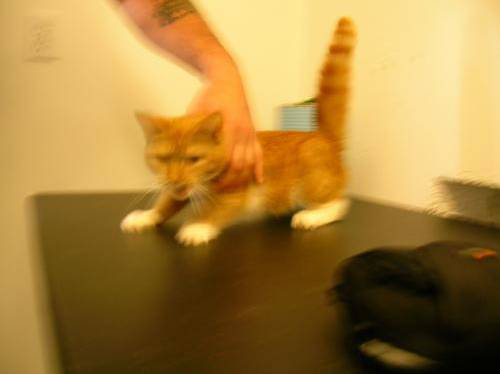

In [62]:
from tensorflow.keras.preprocessing.image import img_to_array

img = Image.open(r"C:\Users\Lab02R01Pc02\Downloads\dogs-vs-cats\dogs-vs-cats_small\train\cats\cat.0.jpg")
img

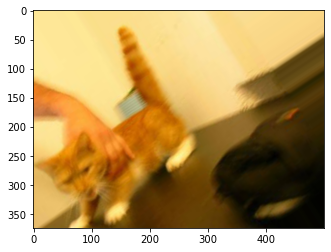

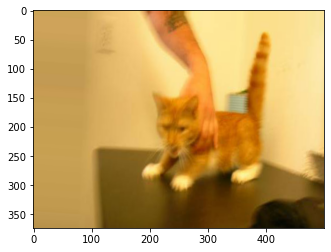

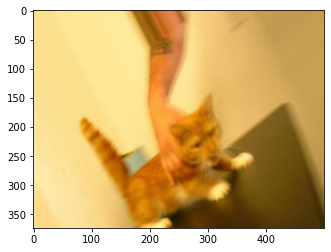

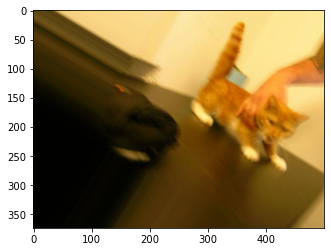

In [63]:
import matplotlib.pyplot as plt
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

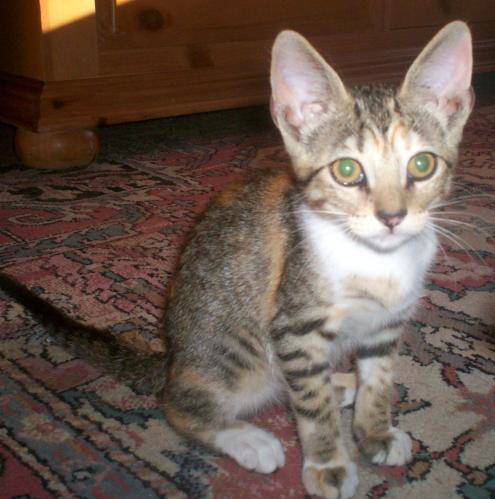

In [57]:
# import os,shutil
# from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image

img = Image.open(r"C:\Users\Lab02R01Pc02\Downloads\dogs-vs-cats\dogs-vs-cats_small\train\cats\cat.7.jpg")
img

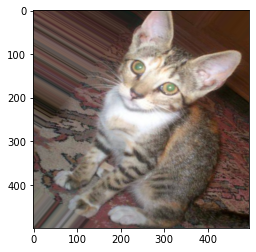

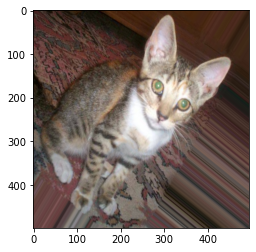

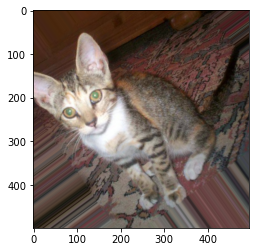

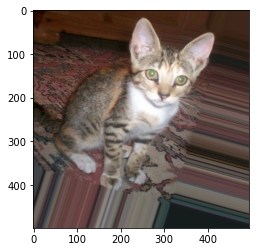

In [58]:
import matplotlib.pyplot as plt
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i =0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# FEATURE EXTRACTION

In [72]:
#using pretrained model


In [65]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 16s 0us/step


In [66]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [67]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'C:/Users/Lab02R01Pc02/Downloads/dogs-vs-cats/dogs-vs-cats_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [68]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 628ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 622ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 638ms/step


In [69]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

In [70]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss='binary_crossentropy',
                metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


100/100 [==============================] - 2s 14ms/step - loss: 0.5920 - acc: 0.6845 - val_loss: 0.4365 - val_acc: 0.8280
Epoch 2/30
100/100 [==============================] - 1s 13ms/step - loss: 0.4266 - acc: 0.8085 - val_loss: 0.3574 - val_acc: 0.8590
Epoch 3/30
100/100 [==============================] - 1s 13ms/step - loss: 0.3594 - acc: 0.8480 - val_loss: 0.3272 - val_acc: 0.8640
Epoch 4/30
100/100 [==============================] - 1s 13ms/step - loss: 0.3189 - acc: 0.8715 - val_loss: 0.2996 - val_acc: 0.8920
Epoch 5/30
100/100 [==============================] - 1s 13ms/step - loss: 0.2955 - acc: 0.8790 - val_loss: 0.2847 - val_acc: 0.8880
Epoch 6/30
100/100 [==============================] - 1s 13ms/step - loss: 0.2693 - acc: 0.8875 - val_loss: 0.2719 - val_acc: 0.8930
Epoch 7/30
100/100 [==============================] - 1s 13ms/step - loss: 0.2497 - acc: 0.9050 - val_loss: 0.2682 - val_acc: 0.8860
Epoch 8/30
100/100 [==============================] - 1s 14ms/step - loss: 0.234

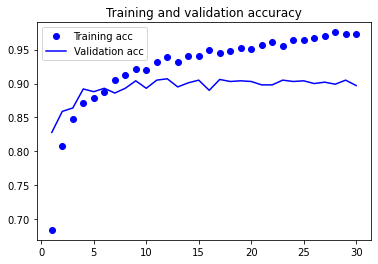

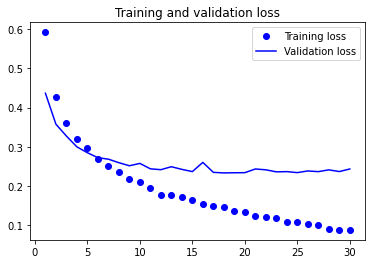

In [71]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# FEATURE EXTRACTION WITH DATA AUGMENTATION

In [73]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [75]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [76]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights after freezing the conv base: 30


In [77]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
            metrics=['acc'])
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


C:\Users\LAB02R~1\AppData\Local\Temp/ipykernel_4684/2216955838.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 304s 3s/step - loss: 0.4471 - acc: 0.7705 - val_loss: 0.2254 - val_acc: 0.9110
Epoch 2/30
 53/100 [==============>...............] - ETA: 2:06 - loss: 0.2817 - acc: 0.8877

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()